In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PowerTransformer
from scipy.stats import normaltest
from scipy import stats
import patsy
import statsmodels.api as sm

%config InlineBackend.figure_format = 'retina'

In [2]:
dfstats = pd.read_csv('Seasons_Stats.csv')

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (2,3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
dfsalary = pd.read_csv('PlayerSalary.csv')
dfstats['Player'] = dfstats['Player'].str.replace('*', '')

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1,2,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/tmp/ipykernel_3662/2330872191.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfstats['Player'] = dfstats['Player'].str.replace('*', '')


In [4]:
dfstats = dfstats[dfstats['Year'] >= 1990]
dfstats = dfstats[dfstats['Year'] <= 2017]
dfstats

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
9547,9547.0,1990.0,Mark Acres,C,27.0,ORL,80.0,50.0,1691.0,8.3,...,0.692,154.0,277.0,431.0,67.0,36.0,25.0,70.0,248.0,362.0
9548,9548.0,1990.0,Michael Adams,PG,27.0,DEN,79.0,74.0,2690.0,15.4,...,0.850,49.0,176.0,225.0,495.0,121.0,3.0,141.0,133.0,1221.0
9549,9549.0,1990.0,Mark Aguirre,SF,30.0,DET,78.0,40.0,2005.0,15.8,...,0.756,117.0,188.0,305.0,145.0,34.0,19.0,121.0,201.0,1099.0
9550,9550.0,1990.0,Danny Ainge,PG,30.0,SAC,75.0,68.0,2727.0,16.1,...,0.831,69.0,257.0,326.0,453.0,113.0,18.0,185.0,238.0,1342.0
9551,9551.0,1990.0,Mark Alarie,PF,26.0,WSB,82.0,10.0,1893.0,14.1,...,0.812,151.0,223.0,374.0,142.0,60.0,39.0,101.0,219.0,860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686.0,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687.0,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688.0,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689.0,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [5]:
final_df = pd.merge(dfstats, dfsalary, how = 'inner', left_on = ['Player','Year'], right_on = ['Player','Year'])
final_df = final_df[final_df['G'] > 40]
final_df

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,STL,BLK,TOV,PF,PTS,Register Value,Salary,Season End,Team,Full Team Name
0,9547.0,1990.0,Mark Acres,C,27.0,ORL,80.0,50.0,1691.0,8.3,...,36.0,25.0,70.0,248.0,362.0,218.0,"$437,000.00",1991.0,ORL,Orlando Magic
1,9548.0,1990.0,Michael Adams,PG,27.0,DEN,79.0,74.0,2690.0,15.4,...,121.0,3.0,141.0,133.0,1221.0,228.0,"$825,000.00",1991.0,DEN,Denver Nuggets
2,9549.0,1990.0,Mark Aguirre,SF,30.0,DET,78.0,40.0,2005.0,15.8,...,34.0,19.0,121.0,201.0,1099.0,219.0,"$1,115,000.00",1991.0,DET,Detroit Pistons
3,9550.0,1990.0,Danny Ainge,PG,30.0,SAC,75.0,68.0,2727.0,16.1,...,113.0,18.0,185.0,238.0,1342.0,63.0,"$725,000.00",1991.0,POR,Portland Trail Blazers
4,9551.0,1990.0,Mark Alarie,PF,26.0,WSB,82.0,10.0,1893.0,14.1,...,60.0,39.0,101.0,219.0,860.0,220.0,"$500,000.00",1991.0,WAS,Washington Wizards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,24684.0,2017.0,Nick Young,SG,31.0,LAL,60.0,60.0,1556.0,14.1,...,37.0,14.0,36.0,137.0,791.0,11694.0,"$5,192,000.00",2018.0,GSW,Golden State Warriors
11482,24685.0,2017.0,Thaddeus Young,PF,28.0,IND,74.0,74.0,2237.0,14.9,...,114.0,30.0,96.0,135.0,814.0,11784.0,"$14,796,348.00",2018.0,IND,Indiana Pacers
11483,24686.0,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,62.0,58.0,65.0,189.0,639.0,11404.0,"$12,584,270.00",2018.0,CHA,Charlotte Hornets
11484,24687.0,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,7.0,21.0,20.0,61.0,178.0,11812.0,"$1,709,538.00",2018.0,NJN,Brooklyn Nets


In [6]:
dfcap = pd.read_csv('salary cap.csv')
df = pd.merge(dfcap, final_df, how='outer', left_on = 'Year', right_on = 'Year')
pd.to_numeric(df['Salary'], errors='coerce')
pd.to_numeric(df['Cap'], errors='coerce')

df['Cap'] = df['Cap'].str.replace('$', '')
df['Cap'] = df['Cap'].str.replace(',', '')
df['Salary'] = df['Salary'].str.replace(',', '')
df['Salary'] = df['Salary'].str.replace('$', '')
df['Cap'] = pd.to_numeric(df['Cap'], errors="coerce")
df['Salary']= pd.to_numeric(df['Salary'], errors="coerce")

df['SalaryPercent'] = (df['Salary']/df['Cap'])*100
df.to_csv('f1.csv')
dfstats.to_csv('resalary.csv')
df

/tmp/ipykernel_3662/2731048110.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Cap'] = df['Cap'].str.replace('$', '')
/tmp/ipykernel_3662/2731048110.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Salary'] = df['Salary'].str.replace('$', '')


,Year,Cap,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,...,BLK,TOV,PF,PTS,Register Value,Salary,Season End,Team,Full Team Name,SalaryPercent
0,1990.0,11871000,9547.0,Mark Acres,C,27.0,ORL,80.0,50.0,1691.0,...,25.0,70.0,248.0,362.0,218.0,437000.0,1991.0,ORL,Orlando Magic,3.681240
1,1990.0,11871000,9548.0,Michael Adams,PG,27.0,DEN,79.0,74.0,2690.0,...,3.0,141.0,133.0,1221.0,228.0,825000.0,1991.0,DEN,Denver Nuggets,6.949709
2,1990.0,11871000,9549.0,Mark Aguirre,SF,30.0,DET,78.0,40.0,2005.0,...,19.0,121.0,201.0,1099.0,219.0,1115000.0,1991.0,DET,Detroit Pistons,9.392638
3,1990.0,11871000,9550.0,Danny Ainge,PG,30.0,SAC,75.0,68.0,2727.0,...,18.0,185.0,238.0,1342.0,63.0,725000.0,1991.0,POR,Portland Trail Blazers,6.107320
4,1990.0,11871000,9551.0,Mark Alarie,PF,26.0,WSB,82.0,10.0,1893.0,...,39.0,101.0,219.0,860.0,220.0,500000.0,1991.0,WAS,Washington Wizards,4.211945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7997,2017.0,99093000,24684.0,Nick Young,SG,31.0,LAL,60.0,60.0,1556.0,...,14.0,36.0,137.0,791.0,11694.0,5192000.0,2018.0,GSW,Golden State Warriors,5.239522
7998,2017.0,99093000,24685.0,Thaddeus Young,PF,28.0,IND,74.0,74.0,2237.0,...,30.0,96.0,135.0,814.0,11784.0,14796348.0,2018.0,IND,Indiana Pacers,14.931779
7999,2017.0,99093000,24686.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,...,58.0,65.0,189.0,639.0,11404.0,12584270.0,2018.0,CHA,Charlotte Hornets,12.699454
8000,2017.0,99093000,24687.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,...,21.0,20.0,61.0,178.0,11812.0,1709538.0,2018.0,NJN,Brooklyn Nets,1.725185


In [7]:
df.columns

Index(['Year', 'Cap', 'Unnamed: 0', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS',
       'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48',
       'blank2', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Register Value',
       'Salary', 'Season End', 'Team', 'Full Team Name', 'SalaryPercent'],
      dtype='object')

In [8]:
df['FGA'] = pd.to_numeric(df['FGA'], errors="coerce")
df['PTS'] = pd.to_numeric(df['PTS'], errors="coerce")
df['TOV'] = pd.to_numeric(df['TOV'], errors="coerce")
df['2P%'] = pd.to_numeric(df['2P%'], errors="coerce")
df['FG%'] = pd.to_numeric(df['FG%'], errors="coerce")
df['STL'] = pd.to_numeric(df['STL'], errors="coerce")
df['WS'] = pd.to_numeric(df['WS'], errors="coerce")
df['PER'] = pd.to_numeric(df['PER'], errors="coerce")
df['AST'] = pd.to_numeric(df['AST'], errors="coerce")
df['VORP'] = pd.to_numeric(df['VORP'], errors="coerce")
df['OWS'] = pd.to_numeric(df['OWS'], errors="coerce")
df['DWS'] = pd.to_numeric(df['DWS'], errors="coerce")
df['DRB'] = pd.to_numeric(df['DRB'], errors="coerce")
df['PF'] = pd.to_numeric(df['PF'], errors="coerce")
df['TRB%'] = pd.to_numeric(df['TRB%'], errors="coerce")
df['ORB%'] = pd.to_numeric(df['ORB%'], errors="coerce")
df['DRB%'] = pd.to_numeric(df['DRB%'], errors="coerce")
df['ORB'] = pd.to_numeric(df['ORB'], errors="coerce")
df['BLK%'] = pd.to_numeric(df['BLK%'], errors="coerce")
df['3PAr'] = pd.to_numeric(df['3PAr'], errors="coerce")
df['BLK'] = pd.to_numeric(df['BLK'], errors="coerce")
df['TRB'] = pd.to_numeric(df['TRB'], errors="coerce")
df['3PA'] = pd.to_numeric(df['3PA'], errors="coerce")
df['3P%'] = pd.to_numeric(df['3P%'], errors="coerce")
df['DBPM'] = pd.to_numeric(df['DBPM'], errors="coerce")
df['3P'] = pd.to_numeric(df['3P'], errors="coerce")
df['FT'] = pd.to_numeric(df['FT'], errors="coerce")
df['FT%'] = pd.to_numeric(df['FT%'], errors="coerce")
df['AST%'] = pd.to_numeric(df['AST%'], errors="coerce")
df['FTr'] = pd.to_numeric(df['FTr'], errors="coerce")
df['STL%'] = pd.to_numeric(df['STL%'], errors="coerce")
df['eFG%'] = pd.to_numeric(df['eFG%'], errors="coerce")
df['TS%'] = pd.to_numeric(df['TS%'], errors="coerce")
df['WS/48'] = pd.to_numeric(df['WS/48'], errors="coerce")
df['2P'] = pd.to_numeric(df['2P'], errors="coerce")
df['BPM'] = pd.to_numeric(df['BPM'], errors="coerce")
df['TOV%'] = pd.to_numeric(df['TOV%'], errors="coerce")
df['3P%'] = df['3P%'].replace(np.nan, 0)

In [9]:
df['Comp1'] = (df['WS']*0.928+df['PTS']*0.907+df['FG%']*0.903+df['2P%']*0.888+df['PER']*0.881+df['FTA']*0.880+df['VORP']*0.868+df['FT%']*0.863+df['2P%']*0.856+df['FGA']*0.852+df['OWS']*0.848+df['BPM']*0.824+df['DRB']*0.797+df['TOV']*0.793+df['TRB']*0.773+df['DWS']*0.771+df['WS/48']*0.763+df['OBPM']*0.726+df['STL']*0.668+df['PF']*0.659+df['USG%']*0.557+df['FG']*0.527+df['ORB%']*0.202+df['TRB%']*0.310+df['DRB%']*0.342+df['3PA']*0.258+df['3P%']*0.255+df['BLK%']*0.228+df['3PAr']*-0.216+df['ORB']*0.620+df['AST%']*0.207+df['3P']*-0.001+df['DBPM']*0.356+df['FT']*0.159+df['BLK']*0.532+df['AST']*0.523+df['FTr']*0.371+df['STL%']*0.099+df['eFG%']*0.439+df['TS%']*0.565+df['2P']*0.492+df['TOV%']*-0.18)
df['Comp2'] = (df['WS']*0.1+df['PTS']*0.285+df['FG%']*0.221+df['2P%']*0.006+df['PER']*0.059+df['FTA']*0.073+df['VORP']*0.129+df['FT%']*0.173+df['2P%']*0.053+df['FGA']*0.320+df['OWS']*0.237+df['BPM']*0.084+df['DRB']*-0.381+df['TOV']*0.25+df['TRB']*-0.486+df['DWS']*-0.194+df['WS/48']*-0.029+df['OBPM']*0.517+df['STL']*0.360+df['PF']*-0.243+df['USG%']*0.310+df['FG']*-0.485+df['ORB%']*-0.864+df['TRB%']*-0.861+df['DRB%']*-0.768+df['3PA']*0.743+df['3P%']*0.730+df['BLK%']*-0.711+df['3PAr']*-0.668+df['ORB']*-0.640+df['AST%']*0.625+df['3P']*0.600+df['DBPM']*-0.594+df['FT']*0.587+df['BLK']*-0.568+df['AST']*0.559+df['FTr']*0.371+df['STL%']*0.099+df['eFG%']*-0.015+df['TS%']*0.062+df['2P']*-0.306+df['TOV%']*-0.115)
df['Comp3'] = (df['WS']*0.170+df['PTS']*-0.178+df['FG%']*-0.203+df['2P%']*-0.302+df['PER']*0.119+df['FTA']*-0.253+df['VORP']*0.153+df['FT%']*-0.233+df['2P%']*-0.390+df['FGA']*-0.270+df['OWS']*0.257+df['BPM']*0.308+df['DRB']*-0.099+df['TOV']*-0.396+df['TRB']*-0.112+df['DWS']*-0.052+df['WS/48']*0.482+df['OBPM']*0.321+df['STL']*-0.208+df['PF']*-0.203+df['USG%']*-0.334+df['FG']*0.430+df['ORB%']*0.009+df['TRB%']*0.038+df['DRB%']*0.043+df['3PA']*0.204+df['3P%']*0.266+df['BLK%']*0.073+df['3PAr']*0.380+df['ORB']*-0.123+df['AST%']*-0.250+df['3P']*0.230+df['DBPM']*0.061+df['FT']*0.087+df['BLK']*-0.045+df['AST']*-0.24+df['FTr']*-0.062+df['STL%']*-0.136+df['eFG%']*0.807+df['TS%']*0.712+df['2P']*0.560+df['TOV%']*-0.265)
df['overall'] = df['Comp1']*0.578+df['Comp2']*0.295+df['Comp3']*0.126
df.sort_values(by=['overall'], inplace=True)
df.dropna(subset=['overall'], how='all', inplace=True)
df.tail(30)

,Year,Cap,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,...,Register Value,Salary,Season End,Team,Full Team Name,SalaryPercent,Comp1,Comp2,Comp3,overall
7069,2015.0,70000000,23114.0,James Harden,SG,25.0,HOU,81.0,81.0,2981.0,...,10371.0,15756438.0,2016.0,HOU,Houston Rockets,22.509197,6436.583581,1639.514761,-697.679649,4116.094529
1464,1995.0,23000000,12136.0,Shaquille O'Neal,C,22.0,ORL,79.0,79.0,2923.0,...,2154.0,5700000.0,1996.0,ORL,Orlando Magic,24.782609,7282.718623,-94.932140,-505.798153,4117.675816
1972,1997.0,26900000,13096.0,Michael Jordan,SG,33.0,CHI,82.0,82.0,3106.0,...,2852.0,33140000.0,1998.0,CHI,Chicago Bulls,123.197026,6737.652995,1005.948863,-432.535873,4136.618826
80,1990.0,11871000,9662.0,Patrick Ewing,C,27.0,NYK,82.0,82.0,3165.0,...,252.0,4250000.0,1991.0,NYK,New York Knicks,35.801533,7352.783800,-102.163017,-524.202391,4153.721445
662,1992.0,14000000,10666.0,Michael Jordan,SG,28.0,CHI,80.0,80.0,3102.0,...,972.0,4000000.0,1993.0,CHI,Chicago Bulls,28.571429,6903.774381,793.139379,-471.722481,4164.920676
4276,2006.0,53135000,17677.0,Gilbert Arenas,PG,24.0,WAS,80.0,80.0,3384.0,...,6419.0,11096800.0,2007.0,WAS,Washington Wizards,20.884163,6472.335858,1721.540729,-623.979698,4170.243199
4925,2008.0,58680000,19017.0,LeBron James,SF,23.0,CLE,75.0,74.0,3027.0,...,7310.0,14410581.0,2009.0,CLE,Cleveland Caveliers,24.557909,6801.718631,1081.834725,-598.871644,4175.076785
4824,2008.0,58680000,18825.0,Kobe Bryant,SG,29.0,LAL,82.0,82.0,3192.0,...,7297.0,21262500.0,2009.0,LAL,Los Angeles Lakers,36.234663,6713.950506,1278.530375,-605.761000,4181.503967
4101,2005.0,49500000,17330.0,Allen Iverson,PG,29.0,PHI,75.0,75.0,3174.0,...,5847.0,16453125.0,2006.0,PHI,Philadelphia 76ers,33.238636,6596.821472,1615.272477,-669.418788,4205.121424
3557,2003.0,43840000,16286.0,Tracy McGrady,SG,23.0,ORL,75.0,74.0,2954.0,...,5388.0,13279750.0,2004.0,ORL,Orlando Magic,30.291401,6778.979433,1306.470744,-541.459869,4235.435038


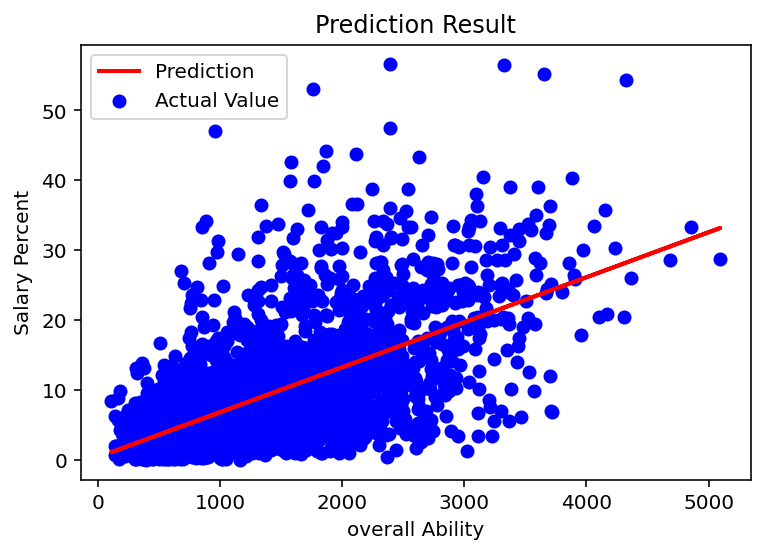

In [10]:

X = df['overall']
y = df['SalaryPercent']
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)
X_train = np.array(X_train).reshape((len(X_train),1))
y_train = np.array(y_train).reshape((len(y_train),1))
X_test = np.array(X_test).reshape(len(X_test), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)

from sklearn.linear_model import LinearRegression
regmodel = linear_model.LinearRegression()
regmodel.fit(X_train, y_train)

y_test_pre = regmodel.predict(X_test)

plt.figure()
plt.scatter(X_test, y_test, color='blue', label='Actual Value')
plt.plot(X_test, y_test_pre, color='red', linewidth=2, label='Prediction')
plt.xlabel("overall Ability")
plt.ylabel("Salary Percent")
plt.title('Prediction Result')
plt.legend()
plt.show()

In [12]:
predict = df['overall']
predict = np.array(predict).reshape((len(predict),1))
df['Predicted Salary Percent'] = regmodel.predict(predict)
df['Predicted Salary Percent']
df['Difference'] = df['Predicted Salary Percent'] - df['SalaryPercent']
df.sort_values(by=['Difference'], inplace=True)
df.tail(50)

,Year,Cap,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,...,Season End,Team,Full Team Name,SalaryPercent,Comp1,Comp2,Comp3,overall,Predicted Salary Percent,Difference
4994,2008.0,58680000,19164.0,Chris Paul,PG,22.0,NOH,80.0,80.0,3006.0,...,2009.0,NOH,New Orleans Pelicans,7.795141,5199.115098,1226.358419,-535.452881,3299.397197,21.626984,13.831843
6453,2013.0,58679000,21995.0,Damian Lillard,PG,22.0,POR,82.0,82.0,3167.0,...,2014.0,POR,Portland Trail Blazers,5.458375,4532.999331,1259.905508,-437.408382,2936.632282,19.293853,13.835478
2956,2001.0,42500000,15256.0,Shawn Marion,SF,22.0,PHO,79.0,79.0,2857.0,...,2002.0,PHO,Phoenix Suns,4.183906,4943.087060,-204.822671,-399.585177,2746.333900,18.069945,13.886039
1719,1996.0,24693000,12591.0,George McCloud,SF,28.0,DAL,79.0,63.0,2846.0,...,1997.0,DAL,Dallas Mavericks,4.454704,4367.034447,1045.556150,-349.792716,2788.511092,18.341209,13.886505
2588,2000.0,35500000,14601.0,Michael Dickerson,SG,24.0,VAN,82.0,82.0,3103.0,...,2001.0,MEM,Memphis Grizzlies,3.691268,4308.409612,761.492195,-355.589031,2670.096735,17.579624,13.888356
6000,2011.0,58044000,21089.0,Russell Westbrook,PG,22.0,OKC,82.0,82.0,2847.0,...,2012.0,OKC,Oklahoma City Thunder,8.756144,5599.123909,1039.444094,-649.719180,3461.065010,22.666755,13.910611
7374,2016.0,94143000,23633.0,Stephen Curry,PG,27.0,GSW,79.0,79.0,2700.0,...,2017.0,GSW,Golden State Warriors,12.865916,6270.842765,1823.649666,-471.862950,4103.069038,26.795819,13.929903
6871,2014.0,63065000,22763.0,Josh Smith,SF,28.0,DET,77.0,76.0,2730.0,...,2015.0,HOU,Houston Rockets,3.293427,4435.668732,349.483023,-408.555889,2615.435977,17.228072,13.934644
3264,2002.0,40271000,15785.0,Shawn Marion,SF,23.0,PHO,81.0,81.0,3109.0,...,2003.0,PHO,Phoenix Suns,5.625326,5275.139548,-60.836159,-388.847830,2982.089165,19.586210,13.960885
371,1991.0,12500000,10180.0,Hersey Hawkins,SG,24.0,PHI,80.0,80.0,3110.0,...,1992.0,PHI,Philadelphia 76ers,6.440000,4975.655455,1001.983116,-450.762540,3114.717792,20.439215,13.999215


In [13]:
dfview = df[['Player','Year','Age','SalaryPercent','Comp1','Comp2','Comp3','overall','SalaryPercent','Predicted Salary Percent','Difference']]
dfview.sort_values(by=['Difference'], inplace=True)
dfview.tail(10)

/opt/conda/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Player,Year,Age,SalaryPercent,Comp1,Comp2,Comp3,overall,SalaryPercent,Predicted Salary Percent,Difference
5483,Kevin Durant,2010.0,21.0,10.430157,6983.271386,1071.049426,-583.324040,4278.791613,10.430157,27.925982,17.495826
3545,Karl Malone,2003.0,39.0,3.421533,5495.636420,422.420356,-558.109160,3230.770102,3.421533,21.185608,17.764075
7696,Devin Booker,2017.0,20.0,2.340589,4851.660303,1098.038688,-432.248880,3073.717709,2.340589,20.175522,17.834932
7961,Isaiah Thomas,2017.0,27.0,6.318706,5625.206244,1778.003606,-468.521878,3716.846516,6.318706,24.311819,17.993114
4378,LeBron James,2006.0,21.0,10.968458,7226.231081,1240.017622,-602.636369,4466.634581,10.968458,29.134099,18.165641
369,Tim Hardaway,1991.0,24.0,5.120000,5689.791593,1168.810863,-544.139501,3564.937168,5.120000,23.334811,18.214811
7967,Karl-Anthony Towns,2017.0,21.0,6.273743,6559.881975,66.411884,-449.844912,3754.522828,6.273743,24.554135,18.280393
4498,Chris Webber,2006.0,32.0,1.244046,5287.652159,83.842275,-474.183819,3021.249258,1.244046,19.838069,18.594023
642,Tim Hardaway,1992.0,25.0,4.928571,5671.793295,1317.429807,-532.649734,3599.824451,4.928571,23.559189,18.630618
3019,Paul Pierce,2001.0,23.0,4.826520,6145.971370,1006.017708,-573.274884,3776.914040,4.826520,24.698145,19.871625
